# Pull ESPN Ownership Data

### MSP 9.4.2017


In [1]:
from IPython.display import HTML
HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.input').hide();} else { $('div.input').show(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# boilerplate imports

import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import matplotlib as mpl
cmap = cm.gnuplot




In [3]:
# imports for scraping

from bs4 import BeautifulSoup

import requests

import operator



### Change In Ownership

Also set up an archive.

In [4]:

Ownership = {}


for tablenum in range(0,14):

    # cycle through all positions
    r  = requests.get('http://games.espn.com/flb/addeddropped?slotCategoryId='+str(tablenum))

    data = r.text

    soup = BeautifulSoup(data)

    tables = soup.findAll('table')


    for table in tables: 

        headings = [th.get_text() for th in table.find("tr").find_all("th")]
        #print headings


        for row in table.find_all("tr")[1:]: 

        #    sav = [td.find('a') for td in row.find_all("td")]
            sav = [td.get_text() for td in row.find_all("td")]

            #print(sav)
            try:
                w = sav.index(u'\xa0')
            except:
                w = 0
                
            #print(w)

            #print (sav[1].split(',')[0]).strip('*')

            try:
                # block out all non-rankings
                xx = float(sav[0])

                #print sav[0:w]
                #print sav[w+1:len(sav)]

                # added
                #print((sav[1].split(',')[0]).strip('*'))
                Ownership[(sav[1].split(',')[0]).strip('*')] = float(sav[5])

                #dropped
                Ownership[(sav[w+2].split(',')[0]).strip('*')] = float(sav[w+6])

            except:
                pass

            #[u'RK', u'PLAYER, TEAM', u'POS', u'LAST', u'CUR', u'7-DAY +/-']
        

today = datetime.date.today()

f = open('ownership-archive/'+str(today)+'.txt','w')

for index,key in enumerate(Ownership.keys()):
    print >>f,key,Ownership[key]
    
f.close()

In [5]:

Ownership = {}


for tablenum in range(0,18):

    # cycle through all positions
    r  = requests.get('http://games.espn.com/flb/addeddropped?slotCategoryId='+str(tablenum))

    data = r.text

    soup = BeautifulSoup(data)

    tables = soup.findAll('table')


    for table in tables: 

        headings = [th.get_text() for th in table.find("tr").find_all("th")]
        #print headings


        for row in table.find_all("tr")[1:]: 

        #    sav = [td.find('a') for td in row.find_all("td")]
            sav = [td.get_text() for td in row.find_all("td")]

            #print(sav)
            try:
                w = sav.index(u'\xa0')
            except:
                w = 0
                
            #print(w)

            #print (sav[1].split(',')[0]).strip('*')

            try:
                # block out all non-rankings
                xx = float(sav[0])

                #print sav[0:w]
                #print sav[w+1:len(sav)]

                # added
                #print((sav[1].split(',')[0]).strip('*'))
                Ownership[(sav[1].split(',')[0]).strip('*')] = float(sav[4])

                #dropped
                Ownership[(sav[w+2].split(',')[0]).strip('*')] = float(sav[w+5])

            except:
                pass

            #[u'RK', u'PLAYER, TEAM', u'POS', u'LAST', u'CUR', u'7-DAY +/-']
        

today = datetime.date.today()

f = open('ownership-archive/'+str(today)+'_poss.txt','w')

for index,key in enumerate(Ownership.keys()):
    print >>f,key,Ownership[key]
    
f.close()

In [6]:

mos = np.arange(1,13,1)
days = np.arange(1,32,1)

modays = np.array([31.,28.,31.,30.,31.,30.,31.,31.,30.,31.,30.,31.])

PDict = {}
for mo in mos:
    for day in days:
        
        try:
            f = open('ownership-archive/2018-{0:02d}-{1:02d}_poss.txt'.format(int(mo),int(day)))
            print('opened',mo,day)
            
            for line in f:
                q = [d for d in line.split()]
                
                name = str(q[0])+' '+str(q[1])
                
                if name in PDict.keys():
                    PDict[name].append([float(np.sum(modays[0:mo])+day),float(q[-1])])
                else:
                    PDict[name] = []
                    PDict[name].append([float(np.sum(modays[0:mo])+day),float(q[-1])])
                
            
        except:
            pass

('opened', 4, 4)
('opened', 4, 5)
('opened', 4, 6)
('opened', 4, 7)
('opened', 4, 8)
('opened', 4, 9)
('opened', 4, 10)
('opened', 4, 11)
('opened', 4, 12)
('opened', 4, 13)
('opened', 4, 14)
('opened', 4, 15)
('opened', 4, 16)
('opened', 4, 17)
('opened', 4, 18)


David Robertson


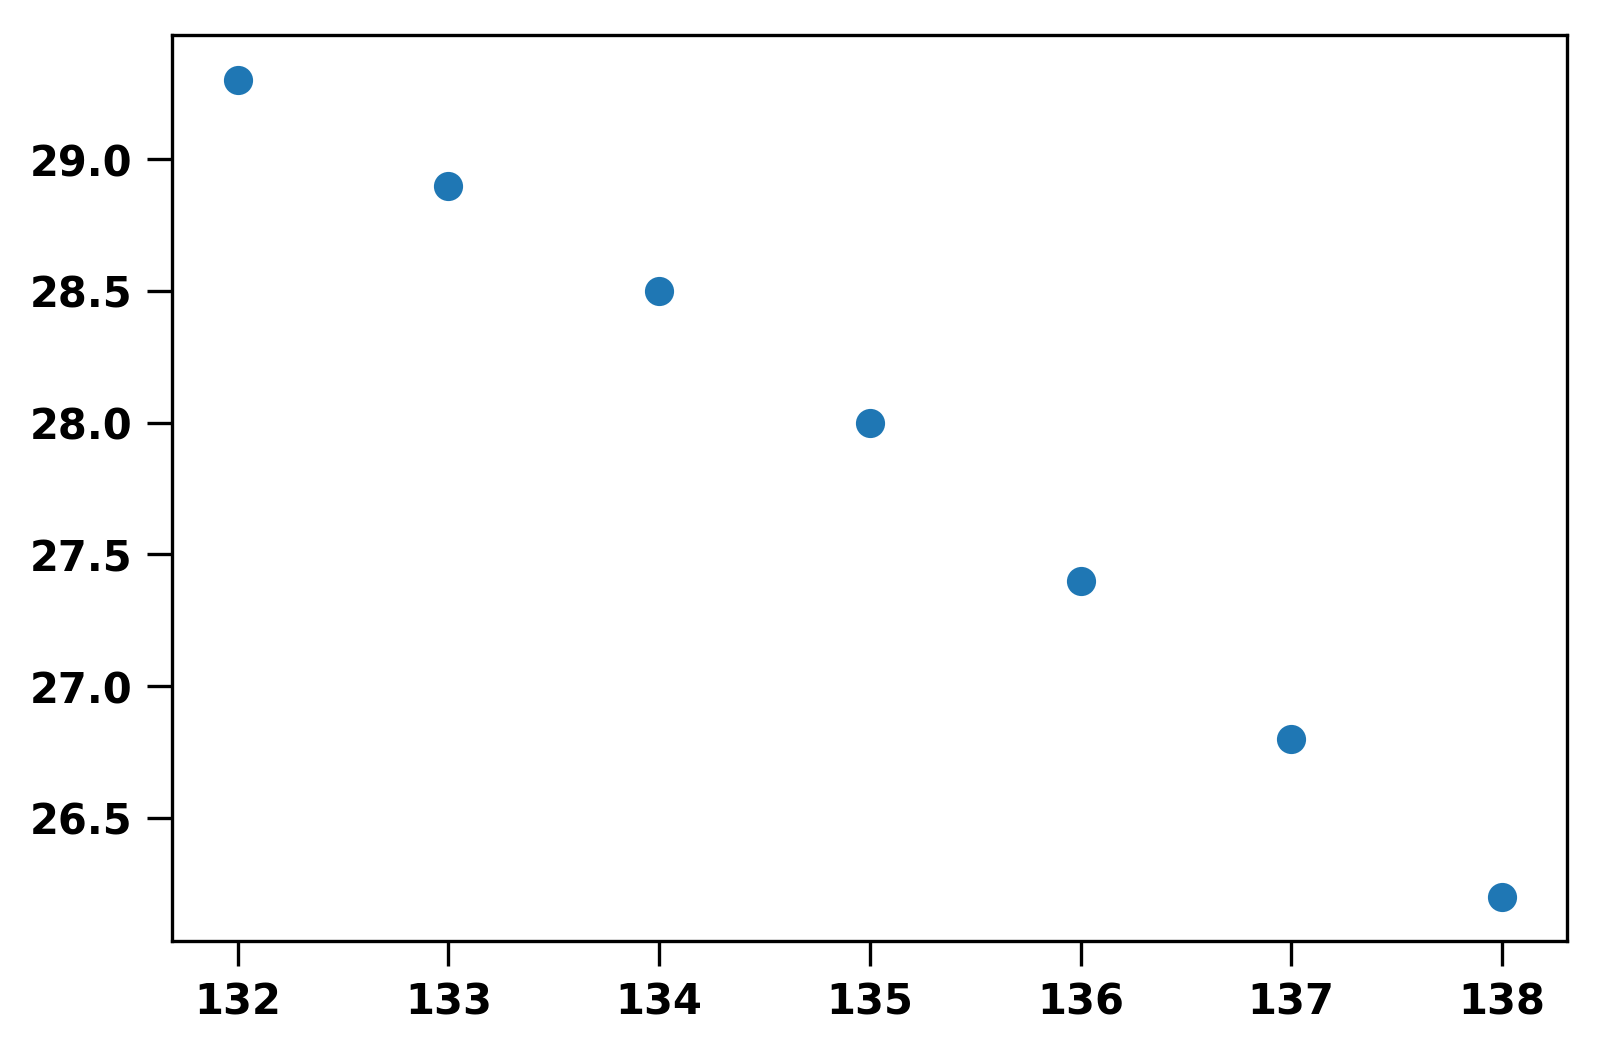

In [7]:
#print([key for key in PDict.keys()])

for pp in ['David Robertson']:
    print(pp)
    plt.scatter(np.array(PDict[pp])[:,0],np.array(PDict[pp])[:,1])